In [1]:
import numpy as np
import random
import pandas as pd
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt

In [3]:
# Load training data
train = pd.read_csv('cleaned_data_train.csv')
test = pd.read_csv('cleaned_data_test.csv')

train = train.drop(columns=['Sample'])
test = test.drop(columns=['Sample'])

X_train = train.drop(columns=['Cancer'])
y_train = train['Cancer']

X_test = test.drop(columns=['Cancer'])
y_test = test['Cancer']

print(X_train.shape)
print(X_test.shape)

# Check the distribution of the target variable
print(y_train.value_counts())
print(y_test.value_counts())


(228, 57736)
(57, 57736)
Cancer
True     180
False     48
Name: count, dtype: int64
Cancer
True     50
False     7
Name: count, dtype: int64


Hyperparameter Tuning

Testing: LR=0.0001, Neurons=16, L2=0.0001, Batch=16


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
F1 Score: 0.7727272727272727
Testing: LR=0.0001, Neurons=16, L2=0.0001, Batch=32


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
F1 Score: 0.865979381443299
Testing: LR=0.0001, Neurons=16, L2=0.0001, Batch=100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
F1 Score: 0.8125
Testing: LR=0.0001, Neurons=16, L2=0.001, Batch=16


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
F1 Score: 0.8333333333333334
Testing: LR=0.0001, Neurons=16, L2=0.001, Batch=32


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
F1 Score: 0.7777777777777778
Testing: LR=0.0001, Neurons=16, L2=0.001, Batch=100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
F1 Score: 0.5945945945945946
Testing: LR=0.0001, Neurons=32, L2=0.0001, Batch=16


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
F1 Score: 0.7
Testing: LR=0.0001, Neurons=32, L2=0.0001, Batch=32


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
F1 Score: 0.9245283018867925
Testing: LR=0.0001, Neurons=32, L2=0.0001, Batch=100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
F1 Score: 0.375
Testing: LR=0.0001, Neurons=32, L2=0.001, Batch=16


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
F1 Score: 0.8
Testing: LR=0.0001, Neurons=32, L2=0.001, Batch=32


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
F1 Score: 0.5454545454545454
Testing: LR=0.0001, Neurons=32, L2=0.001, Batch=100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
F1 Score: 0.88
Testing: LR=0.0001, Neurons=64, L2=0.0001, Batch=16


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
F1 Score: 0.7272727272727273
Testing: LR=0.0001, Neurons=64, L2=0.0001, Batch=32


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
F1 Score: 0.5833333333333334
Testing: LR=0.0001, Neurons=64, L2=0.0001, Batch=100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
F1 Score: 0.8043478260869565
Testing: LR=0.0001, Neurons=64, L2=0.001, Batch=16


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
F1 Score: 0.7142857142857143
Testing: LR=0.0001, Neurons=64, L2=0.001, Batch=32


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
F1 Score: 0.7777777777777778
Testing: LR=0.0001, Neurons=64, L2=0.001, Batch=100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
F1 Score: 0.5555555555555556
Testing: LR=0.001, Neurons=16, L2=0.0001, Batch=16


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
F1 Score: 0.7073170731707317
Testing: LR=0.001, Neurons=16, L2=0.0001, Batch=32


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
F1 Score: 0.75
Testing: LR=0.001, Neurons=16, L2=0.0001, Batch=100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
F1 Score: 0.6904761904761905
Testing: LR=0.001, Neurons=16, L2=0.001, Batch=16


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
F1 Score: 0.6075949367088608
Testing: LR=0.001, Neurons=16, L2=0.001, Batch=32


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
F1 Score: 0.46153846153846156
Testing: LR=0.001, Neurons=16, L2=0.001, Batch=100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
F1 Score: 0.5
Testing: LR=0.001, Neurons=32, L2=0.0001, Batch=16


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
F1 Score: 0.5789473684210527
Testing: LR=0.001, Neurons=32, L2=0.0001, Batch=32


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
F1 Score: 0.07692307692307693
Testing: LR=0.001, Neurons=32, L2=0.0001, Batch=100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
F1 Score: 0.6666666666666666
Testing: LR=0.001, Neurons=32, L2=0.001, Batch=16


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
F1 Score: 0.7912087912087912
Testing: LR=0.001, Neurons=32, L2=0.001, Batch=32


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
F1 Score: 0.6133333333333333
Testing: LR=0.001, Neurons=32, L2=0.001, Batch=100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
F1 Score: 0.32786885245901637
Testing: LR=0.001, Neurons=64, L2=0.0001, Batch=16


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
F1 Score: 0.6419753086419753
Testing: LR=0.001, Neurons=64, L2=0.0001, Batch=32


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
F1 Score: 0.5352112676056338
Testing: LR=0.001, Neurons=64, L2=0.0001, Batch=100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
F1 Score: 0.5526315789473685
Testing: LR=0.001, Neurons=64, L2=0.001, Batch=16


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
F1 Score: 0.36923076923076925
Testing: LR=0.001, Neurons=64, L2=0.001, Batch=32


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
F1 Score: 0.3
Testing: LR=0.001, Neurons=64, L2=0.001, Batch=100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
F1 Score: 0.6052631578947368
Testing: LR=0.01, Neurons=16, L2=0.0001, Batch=16


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
F1 Score: 0.9523809523809523
Testing: LR=0.01, Neurons=16, L2=0.0001, Batch=32


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
F1 Score: 0.8131868131868132
Testing: LR=0.01, Neurons=16, L2=0.0001, Batch=100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
F1 Score: 0.7727272727272727
Testing: LR=0.01, Neurons=16, L2=0.001, Batch=16


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
F1 Score: 0.8666666666666667
Testing: LR=0.01, Neurons=16, L2=0.001, Batch=32


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
F1 Score: 0.6027397260273972
Testing: LR=0.01, Neurons=16, L2=0.001, Batch=100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
F1 Score: 0.9387755102040817
Testing: LR=0.01, Neurons=32, L2=0.0001, Batch=16


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
F1 Score: 0.8387096774193549
Testing: LR=0.01, Neurons=32, L2=0.0001, Batch=32


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
F1 Score: 0.5714285714285714
Testing: LR=0.01, Neurons=32, L2=0.0001, Batch=100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
F1 Score: 0.4
Testing: LR=0.01, Neurons=32, L2=0.001, Batch=16


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
F1 Score: 0.735632183908046
Testing: LR=0.01, Neurons=32, L2=0.001, Batch=32


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
F1 Score: 0.8913043478260869
Testing: LR=0.01, Neurons=32, L2=0.001, Batch=100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
F1 Score: 0.8631578947368421
Testing: LR=0.01, Neurons=64, L2=0.0001, Batch=16


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
F1 Score: 0.92
Testing: LR=0.01, Neurons=64, L2=0.0001, Batch=32


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
F1 Score: 0.8979591836734694
Testing: LR=0.01, Neurons=64, L2=0.0001, Batch=100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
F1 Score: 0.5945945945945946
Testing: LR=0.01, Neurons=64, L2=0.001, Batch=16


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
F1 Score: 0.9072164948453608
Testing: LR=0.01, Neurons=64, L2=0.001, Batch=32


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
F1 Score: 0.8421052631578947
Testing: LR=0.01, Neurons=64, L2=0.001, Batch=100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
F1 Score: 0.92
Best Hyperparameters (Manual Grid Search): {'learning_rate': 0.01, 'num_neurons': 16, 'l2_reg': 0.0001, 'batch_size': 16}
Best F1 Score: 0.9523809523809523
Reloading Tuner from hyperparam_dir/cancer_classification/tuner0.json
Best Hyperparameters (Keras Tuner): {'num_neurons': 48, 'l2_reg': 0.001, 'learning_rate': 0.01, 'tuner/epochs': 50, 'tuner/initial_epoch': 17, 'tuner/bracket': 3, 'tuner/round': 3, 'tuner/trial_id': '0048'}


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - accuracy: 0.7231 - loss: 7.3434 - val_accuracy: 0.7826 - val_loss: 28.4540
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9592 - loss: 4.7932 - val_accuracy: 0.8261 - val_loss: 17.3234
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9290 - loss: 7.6062 - val_accuracy: 0.7391 - val_loss: 30.7090
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9951 - loss: 3.1341 - val_accuracy: 0.6739 - val_loss: 36.6929
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9964 - loss: 3.1885 - val_accuracy: 0.6957 - val_loss: 34.7866
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 3.0867 - val_accuracy: 0.7391 - val_loss: 32.1593
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 2.8741 - val_accuracy: 0.7609 - val_loss: 29.5248
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 2.6203 - val_accuracy: 0.7609 - val_loss:

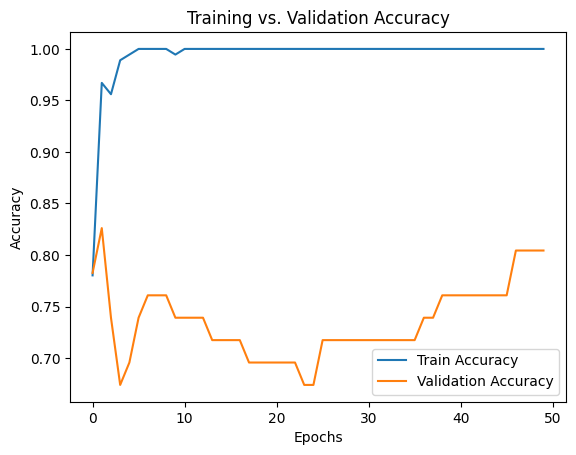

In [31]:
import keras_tuner as kt


def create_model(input_dim, learning_rate=0.001, num_neurons=16, l2_reg=0.0001):
    model = Sequential()
    model.add(Dense(num_neurons, activation='relu', kernel_regularizer=l2(l2_reg), input_shape=(input_dim,)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

learning_rates = [0.0001, 0.001, 0.01]
num_neurons_list = [16, 32, 64]
l2_regs = [0.0001, 0.001]
batch_sizes = [16, 32, 100]

best_f1 = 0
best_params = {}

for lr in learning_rates:
    for neurons in num_neurons_list:
        for l2_reg in l2_regs:
            for batch_size in batch_sizes:
                print(f"Testing: LR={lr}, Neurons={neurons}, L2={l2_reg}, Batch={batch_size}")
                model = create_model(X_train.shape[1], learning_rate=lr, num_neurons=neurons, l2_reg=l2_reg)
                early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
                history = model.fit(X_train, y_train, epochs=100, batch_size=batch_size,
                                    validation_split=0.2, callbacks=[early_stopping], verbose=0)
                
                # Evaluate
                y_pred_prob = model.predict(X_test)
                y_pred = (y_pred_prob > 0.5).astype(int)
                f1 = f1_score(y_test, y_pred)
                print(f"F1 Score: {f1}")

                if f1 > best_f1:
                    best_f1 = f1
                    best_params = {'learning_rate': lr, 'num_neurons': neurons, 'l2_reg': l2_reg, 'batch_size': batch_size}

print("Best Hyperparameters (Manual Grid Search):", best_params)
print("Best F1 Score:", best_f1)

# Function to create a model for Keras Tuner
def model_builder(hp):
    model = Sequential()
    hp_neurons = hp.Int('num_neurons', min_value=16, max_value=128, step=16)
    hp_l2 = hp.Choice('l2_reg', values=[0.0001, 0.001, 0.01])
    hp_lr = hp.Choice('learning_rate', values=[0.0001, 0.001, 0.01])

    model.add(Dense(hp_neurons, activation='relu', kernel_regularizer=l2(hp_l2), input_shape=(input_dim,)))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=hp_lr), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Keras Tuner Hyperparameter Optimization
tuner = kt.Hyperband(model_builder, objective='val_accuracy', max_epochs=50, factor=3,
                     directory='hyperparam_dir', project_name='cancer_classification')

tuner.search(X_train, y_train, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters (Keras Tuner):", best_hps.values)

# Build the best model from Keras Tuner
best_model = tuner.hypermodel.build(best_hps)

# Train the best model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Train the best model
history = best_model.fit(
    X_train, 
    y_train, 
    epochs=best_hps.get('tuner/epochs'),  # Tuned number of epochs
    batch_size=best_hps.values.get('batch_size', 32),  # Default batch size if not tuned
    validation_split=0.2, 
    callbacks=[early_stopping]
)

# Evaluate on test data
results = best_model.evaluate(X_test, y_test)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

# Evaluate on test data
results = best_model.evaluate(X_test, y_test)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

# Plot training vs validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs. Validation Accuracy')
plt.show()


In [32]:
print("Best Hyperparameters (Manual Grid Search):", best_params)
print("Best Hyperparameters (Keras Tuner):", best_hps.values)


Best Hyperparameters (Manual Grid Search): {'learning_rate': 0.01, 'num_neurons': 16, 'l2_reg': 0.0001, 'batch_size': 16}
Best Hyperparameters (Keras Tuner): {'num_neurons': 48, 'l2_reg': 0.001, 'learning_rate': 0.01, 'tuner/epochs': 50, 'tuner/initial_epoch': 17, 'tuner/bracket': 3, 'tuner/round': 3, 'tuner/trial_id': '0048'}


In [33]:
# Use best_hps.values to retrieve hyperparameters safely
final_model = create_model(
    input_dim=X_train.shape[1],
    learning_rate=best_hps.values.get('learning_rate', 0.001),  # Default learning rate
    num_neurons=best_hps.values.get('num_neurons', 16),        # Default number of neurons
    l2_reg=best_hps.values.get('l2_reg', 0.0001)               # Default L2 regularization
)

# Train the final model
history = final_model.fit(
    X_train, 
    y_train, 
    validation_split=0.2, 
    epochs=50, 
    batch_size=best_hps.values.get('batch_size', 32),  # Default batch size
    callbacks=[early_stopping]
)

# Evaluate on test set
results = final_model.evaluate(X_test, y_test)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - accuracy: 0.7131 - loss: 4.8246 - val_accuracy: 0.8043 - val_loss: 16.2821
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9827 - loss: 2.7508 - val_accuracy: 0.8478 - val_loss: 13.9284
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9727 - loss: 2.9139 - val_accuracy: 0.7174 - val_loss: 27.1722
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9960 - loss: 2.7628 - val_accuracy: 0.7826 - val_loss: 26.3150
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 2.7389 - val_accuracy: 0.8261 - val_loss: 17.8937
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9940 - loss: 2.7354 - val_accuracy: 0.8261 - val_loss: 16.2798
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 2.4525 - val_accuracy: 0.8261 - val_loss: 17.4985
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 2.2401 - val_accuracy: 0.8261 - val_loss:

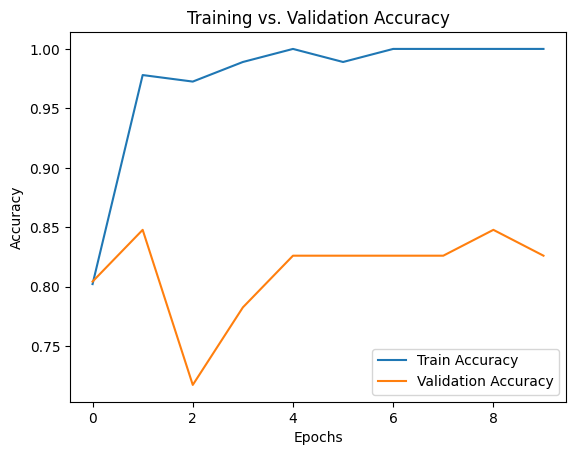

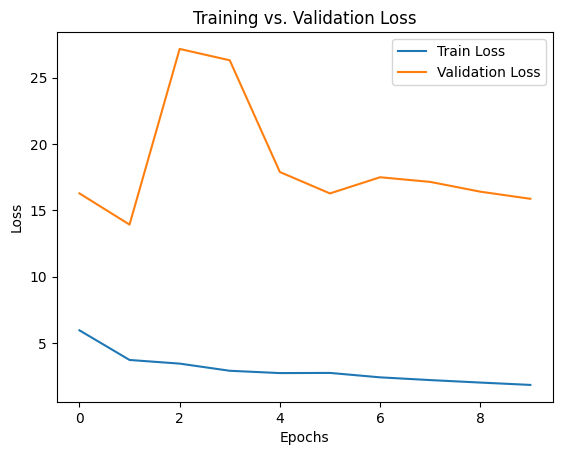

In [34]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs. Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs. Validation Loss')
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Predicted Probabilities: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Predicted Classes: [1 1 1 1 1 1 1 1 1 1]
F1 score: 0.9230769230769231


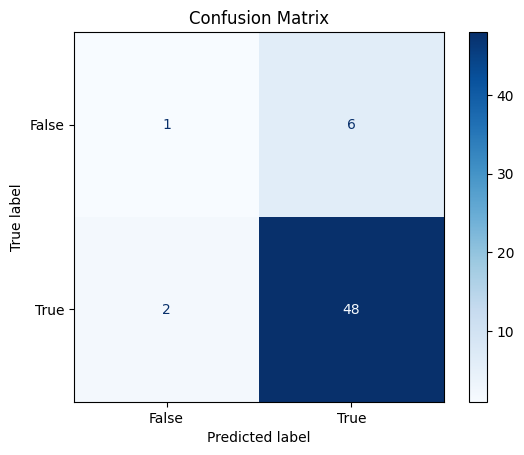

In [38]:
y_pred_prob = final_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Display the predictions
print("Predicted Probabilities:", y_pred_prob[:10].flatten())  # Show the first 10 probabilities
print("Predicted Classes:", y_pred[:10].flatten())            # Show the first 10 class predictions

# Calculate f1 score
f1 = f1_score(y_test, y_pred)
print('F1 score:', f1)
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# **Interpretation of Results**

The neural network performs much poorer than linear and logistic regression, it just overfits the data, and predict everything as 1. Neural network might be too complex for the data set with a clear correlation between the features(FPKM value of each gene) and the target variable(Cancer or not).

For the neural network itself, I tried some smaller ones and some bigger ones with more layers and nodes, but the results are all similar. My machine cannot handle more nodes, so I cannot try a very big neural network. But I think the neural network is not suitable for this data set.